# Extraction of GRIP Road Density via BYOC Collection

In [1]:
import os

# define repo name and get root working directory
repo = 'byoc'
root_path = os.getcwd()[ 0 : os.getcwd().find( repo ) + len ( repo )]
root_path

'C:\\Users\\crwil\\Documents\\GitHub\\sentinelhub\\apis\\byoc'

### _Setup imports and configuration_

In [2]:
from sentinelhub import (
    SHConfig, DataCollection, Geometry, BBox, CRS,
    SentinelHubRequest, filter_times, bbox_to_dimensions, MimeType,
    SentinelHubBYOC, ByocCollection, ByocTile, ByocCollectionAdditionalData,
    DownloadFailedException
)

# Initialize SentinelHubBYOC class
config = SHConfig()

In [3]:
# get pathname to configuration file
cfg_path = os.path.join( os.path.join( root_path, 'cfg/grip' ) )
cfg_file = os.path.join( cfg_path, 'density.yml' )
with open( cfg_file ) as f:
    print ( f.read() )

request:
    evalscript: |
                //VERSION=3
                function setup() {
                    return {
                        input: [{
                            bands: ["density" ],
                        } ],
                        output: { 
                            bands: 1, sampleType: SampleType.FLOAT32
                        }
                    }
                }
                function evaluatePixel(samples) {                  
                    return [ samples.density ]
                }
    inputs:
        - collection: byoc-149678c8-200a-4c6d-b0e5-8ad5e8c53c76
responses:
    default: TIFF



In [4]:
import yaml
from munch import munchify

# load cfg file using yaml parser
with open( cfg_file, 'r' ) as f:
    config = munchify( yaml.safe_load( f ) )

### _Define Area of Interest covering southern UK_

In [5]:
# setup aoi limits and resolution
coords = -5, 50, 1, 53
resolution = 1000

In [6]:
# create instance of shclient class
from processapi import Client
client = Client( config )

In [7]:
# get utm bbox
bbox = client.getBoundingBox( coords, src_crs=CRS(4326) )
print ( bbox, bbox.crs.value )

356670.8761154661,5540547.369934658,768381.4082343623,5879757.6296119075 32630


In [8]:
# get aoi image dimensions
client.getBoxDimensions( bbox, resolution )

(412, 339)

### _Pick timeframe encompassing BYOC time series_

In [9]:
# pick a few dates
from datetime import datetime
timeframe = { 'start' : datetime( 2010, 9, 1, 0, 0, 0 ), 
                'end' : datetime( 2019, 11, 7, 23, 59, 59 ) }
timeframe

{'start': datetime.datetime(2010, 9, 1, 0, 0),
 'end': datetime.datetime(2019, 11, 7, 23, 59, 59)}

In [10]:
# get S1 acquisitions between start / end dates satisfying filter conditions
client.getDatasetTimeStamps( config.request.inputs[ 0 ], bbox, timeframe )

[datetime.datetime(2018, 1, 1, 0, 0, tzinfo=tzutc())]

### _Get BYOC extract fused with spatially and temporally collocated Sentinel-2 imagery_

In [11]:
# get time series
response = client.getTimeSeries ( bbox, timeframe, resolution )
response._df

,default,time
0,"[[-9999.0, -9999.0, -9999.0, -9999.0, -9999.0,...",2018-01-01 00:00:00+00:00


In [12]:
import numpy as np

np.max( response._df.loc[ 0 ][ 0 ] )

13353.0

C:\Users\crwil\AppData\Roaming\Python\Python39\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\crwil\AppData\Roaming\Python\Python39\site-packages\cartopy\crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\crwil\AppData\Roaming\Python\Python39\site-packages\cartopy\crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


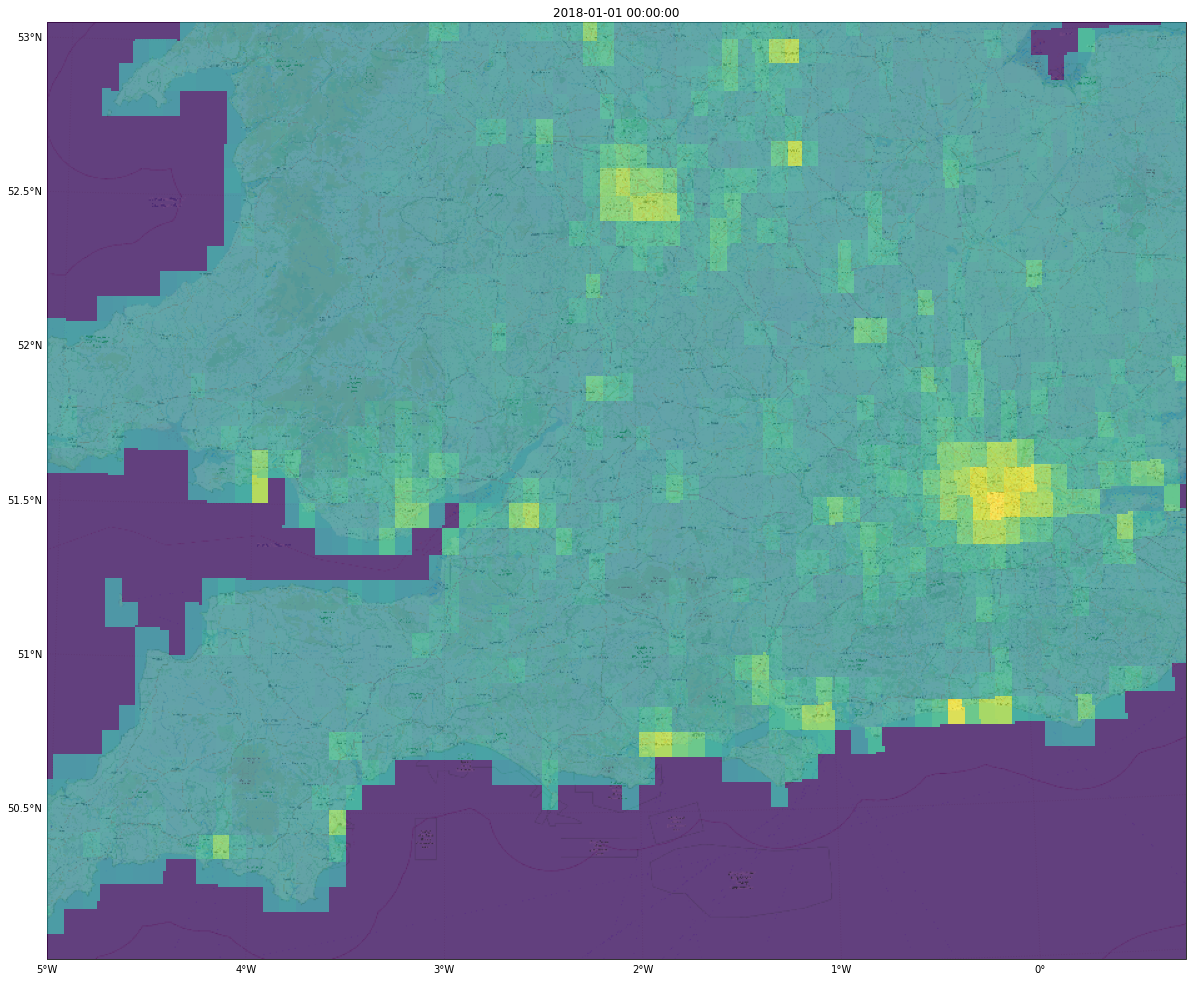

In [13]:
response.plotImages( 'default', osm_zoom=10, alpha={ 'data' : 0.7, 'grid' : 0.3 } )

In [14]:
ds = response.convertToDataset()
ds

<xarray.Dataset>
Dimensions:  (x: 412, y: 339, time: 1)
Coordinates:
    east     (x) float64 3.567e+05 3.577e+05 3.587e+05 ... 7.667e+05 7.677e+05
    north    (y) float64 5.88e+06 5.879e+06 5.878e+06 ... 5.543e+06 5.542e+06
  * time     (time) datetime64[ns] 2018-01-01
Dimensions without coordinates: x, y
Data variables:
    default  (x, y, time) float32 -9.999e+03 -9.999e+03 ... -9.999e+03

In [15]:
dir( ds )

['_HANDLED_TYPES',
 '__abs__',
 '__abstractmethods__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__copy__',
 '__dask_graph__',
 '__dask_keys__',
 '__dask_layers__',
 '__dask_optimize__',
 '__dask_postcompute__',
 '__dask_postpersist__',
 '__dask_scheduler__',
 '__dask_tokenize__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__orig_bases__',
 '__parameters__',
 '